In [23]:
import pandas as pd
credit_df = pd.read_csv(r'C:\Users\festu\ML05102025\myML\Credit_Analysis\credit_data.csv')

In [24]:
# The first 5 rows of the dataframe
print (credit_df.head())

   clientid       income        age         loan  default
0         1  66155.92510  59.017015  8106.532131        0
1         2  34415.15397  48.117153  6564.745018        0
2         3  57317.17006  63.108049  8020.953296        0
3         4  42709.53420  45.751972  6103.642260        0
4         5  66952.68885  18.584336  8770.099235        1


In [25]:
#Lets checl the columns of the dataframe
print(credit_df.columns)

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')


In [26]:
#Show the missiong data
print(credit_df.isnull().sum())

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


In [27]:
#Mean age of the customers
print(credit_df['age'].mean())

40.80755937844266


In [28]:
#Lets check the number of customers in the dataset
print(credit_df['clientid'].count())

2000


In [29]:
#lets fill the missing values in the age column with the mean
credit_df['age'].fillna(credit_df['age'].mean(), inplace= False)

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [30]:
#checking if we changed the missing values
print(credit_df['age'].isnull().sum())

3


In [31]:
#Display summary statistics of the DataFrame
print(credit_df.describe())

          clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459720    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117310    41.317159   3974.719418     0.000000
75%    1500.250000  57791.281670    52.587040   6432.410625     0.000000
max    2000.000000  69995.685580    63.971796  13766.051240     1.000000


In [32]:
#We know that the CustomerID is unique for each customer, so we can drop it from the dataset since it won't help us in our analysis.
credit_df.drop('clientid', axis=1, inplace=False)

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0
1996,69516.12757,23.162104,3503.176156,0
1997,44311.44926,28.017167,5522.786693,1
1998,43756.05660,63.971796,1622.722598,0


In [ ]:
from xgboost import XGBClassifier
#sklearn is a machine learning library that provides a wide range of algorithms for classification, regression, and clustering tasks.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#features and target variable
#features are the input variables used to predict the target variable
X = credit_df.drop('default', axis=1)
#target variable is the output variable we want to predict
y = credit_df['default']

#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model 
model = XGBClassifier()
#fit the model to the training data
#fit method is used to train the model on the training data
model.fit(X_train, y_train)

#predicting the target variable for the test data
y_pred = model.predict(X_test)

#calculating the accuracy of the model or evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#displaying the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       330
           1       1.00      0.94      0.97        70

    accuracy                           0.99       400
   macro avg       0.99      0.97      0.98       400
weighted avg       0.99      0.99      0.99       400



In [36]:
# Lets check if the data Leakage is present
#data leakage occurs when the model is trained on data that it should not have access to during training
#this can happen if the model is trained on data that includes information about the target variable
#or if the model is trained on data that is not representative of the real-world scenario
#to check for data leakage, we can use the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[330   0]
 [  4  66]]


What This Means:

330 true non-defaulters were correctly predicted.

66 true defaulters were correctly predicted.

Only 4 defaulters were incorrectly predicted as non-defaulters — this is the most critical error in credit risk.

In [38]:
#Adjust Prediction Threshold
#The default threshold for binary classification is 0.5
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]  # probabilities for class 1

# Adjust threshold from 0.5 to 0.4
threshold = 0.4
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluate
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


[[330   0]
 [  4  66]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       330
           1       1.00      0.94      0.97        70

    accuracy                           0.99       400
   macro avg       0.99      0.97      0.98       400
weighted avg       0.99      0.99      0.99       400



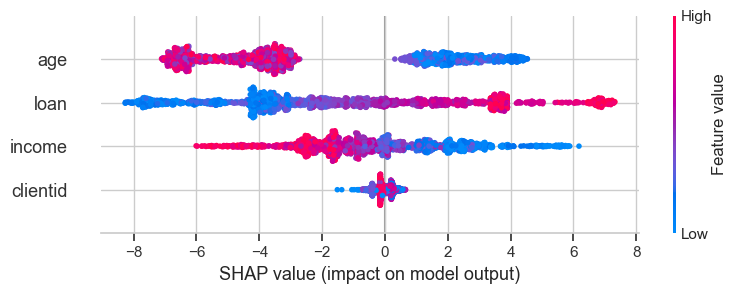

In [35]:
# Explain with SHAP
import shap


explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot summary
shap.summary_plot(shap_values, X)

**📊 Interpretation by Feature:**
1. age
Higher age (red) tends to push the prediction left (toward no default).

Lower age (blue) pushes the prediction right (toward default).

✅ Interpretation: Younger clients are more likely to default according to the model.

2. loan
Higher loan amounts (red) push the model output right (toward default).

✅ Interpretation: Bigger loans increase the chance of default.

3. income
Higher incomes (red) push the SHAP value left (less likely to default).

✅ Interpretation: Higher income reduces default risk, which makes sense.

4. clientid
This feature has SHAP values centered tightly around zero, meaning it has no real predictive power.

***⚠️ Action: Should drop clientid from your model — it's not helpful and just adds noise.***

🔥 Summary
Most important features: **loan, income, and age.**

In [45]:
#LEts try to predict on new dataset


# Load new data
rand_df = pd.read_csv(r'C:\Users\festu\ML05102025\myML\Credit_Analysis\Credit_Defaults_Sample.csv')

print(rand_df)


    income  age   loan  defaults
0    50000   45  10000         0
1    60000   34  15000         0
2    45000   29   8000         0
3    70000   51  12000         0
4    55000   40   7500         0
5    40000   36   5000         1
6    35000   28   3000         1
7    48000   32   9000         0
8    38000   27   4000         1
9    65000   50  14000         0
10   30000   24   2000         1
11   55000   44  10000         0
12   42000   31   6000         1
13   58000   46  11000         0
14   36000   26   3500         1


In [47]:
#lets try to predict on the new dataset
#features and target variable
x = rand_df.drop('defaults', axis=1)

#target variable is the output variable we want to predict
y = rand_df['defaults']

#Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#training the model
model = XGBClassifier()
#fit the model to the training data
#fit method is used to train the model on the training data
model.fit(x_train, y_train)

#predicting the target variable for the test data
y_pred = model.predict(x_test)

#calculating the accuracy of the model or evaluating the model
accuracy = accuracy_score(y_test, y_pred)   
print(f'Accuracy: {accuracy:.2f}')
#displaying the classification report
print(classification_report(y_test, y_pred))
#displaying the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

[[3]]


C:\Users\festu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
